In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from keras.preprocessing.image import ImageDataGenerator

# Image Augmentation

In [3]:
datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1, 
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest')

In [4]:
DATADIR="resim"
CATEGORIES=["TCkimlik","Metin","Yabanci"]

In [5]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array=img_array.reshape((1,)+img_array.shape)
            i=0
            for batch in datagen.flow(img_array, batch_size=1,
                                 save_to_dir=path, save_prefix=category, save_format="jpg"):
                i+=1
                if i>5:
                    break
        except Exception as e:
                pass

In [6]:
IMG_SIZE=200
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [7]:
print(len(training_data))

328


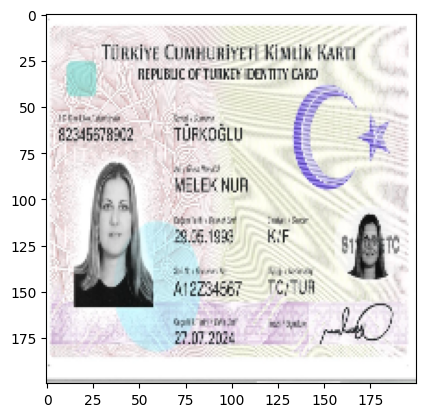

In [8]:
plt.imshow(training_data[0][0])

In [9]:
import random
random.shuffle(training_data)

In [10]:
x=[]
y=[]
for features, label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,IMG_SIZE, IMG_SIZE,3)

#  Creating Model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [12]:
x=x/255.0

y=np.array(y)

In [13]:
type(y)

numpy.ndarray

In [14]:
len(x)

328

In [15]:
model=Sequential()
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=['accuracy'])
model.fit(x, y, batch_size=4, epochs=12, validation_split=0.3)

Epoch 1/12
58/58 [==============================] - 12s 194ms/step - loss: 24.3098 - accuracy: 0.1834 - val_loss: -8.5751 - val_accuracy: 0.1515
Epoch 2/12
58/58 [==============================] - 11s 194ms/step - loss: -10.1055 - accuracy: 0.1528 - val_loss: -122.5656 - val_accuracy: 0.1515
Epoch 3/12
58/58 [==============================] - 11s 190ms/step - loss: 74.9956 - accuracy: 0.1834 - val_loss: -298.4488 - val_accuracy: 0.1515
Epoch 4/12
58/58 [==============================] - 11s 192ms/step - loss: 10.3843 - accuracy: 0.1528 - val_loss: -216.9637 - val_accuracy: 0.1515
Epoch 5/12
58/58 [==============================] - 11s 196ms/step - loss: 1018.0436 - accuracy: 0.1485 - val_loss: -679.7521 - val_accuracy: 0.1515
Epoch 6/12
58/58 [==============================] - 11s 193ms/step - loss: -446.6396 - accuracy: 0.1528 - val_loss: -819.1419 - val_accuracy: 0.1818
Epoch 7/12
58/58 [==============================] - 11s 195ms/step - loss: -178.6876 - accuracy: 0.1747 - val_loss:

In [18]:
CATEGORIES=["TCkimlik","Metin","Yabanci"]
def prepare(filepath):
    IMG_SIZE=200
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict([prepare("img/halil.jpg")])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 40ms/step
Metin


In [19]:
model.fit(x, y, batch_size=8, epochs=12, validation_split=0.3)

Epoch 1/12
29/29 [==============================] - 8s 289ms/step - loss: -167588.4062 - accuracy: 0.1659 - val_loss: -277199.4375 - val_accuracy: 0.1515
Epoch 2/12
29/29 [==============================] - 8s 285ms/step - loss: -283526.6250 - accuracy: 0.1485 - val_loss: -532482.1250 - val_accuracy: 0.1515
Epoch 3/12
29/29 [==============================] - 8s 284ms/step - loss: -306817.0625 - accuracy: 0.1485 - val_loss: -1147121.2500 - val_accuracy: 0.1515
Epoch 4/12
29/29 [==============================] - 8s 289ms/step - loss: -642337.8750 - accuracy: 0.1485 - val_loss: -1361656.8750 - val_accuracy: 0.1515
Epoch 5/12
29/29 [==============================] - 8s 289ms/step - loss: -1042012.6875 - accuracy: 0.1485 - val_loss: -1861210.5000 - val_accuracy: 0.1515
Epoch 6/12
29/29 [==============================] - 8s 290ms/step - loss: -1529910.8750 - accuracy: 0.1485 - val_loss: -2886991.2500 - val_accuracy: 0.1515
Epoch 7/12
29/29 [==============================] - 8s 290ms/step - lo

In [21]:
CATEGORIES=["TCkimlik","Metin","Yabanci"]
def prepare(filepath):
    IMG_SIZE=200
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict([prepare("img/durmus.jpg")])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 22ms/step
Metin


# Image Size 50

In [22]:
IMG_SIZE=50
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [23]:
import random
random.shuffle(training_data)

In [24]:
len(training_data)

328

In [25]:
x=[]
y=[]
for features, label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,IMG_SIZE, IMG_SIZE,3)

In [26]:
x=x/255.0

y=np.array(y)

In [ ]:
model=Sequential()
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=['accuracy'])
model.fit(x, y, batch_size=4, epochs=6, validation_split=0.3)

Epoch 1/6
58/58 [==============================] - 2s 15ms/step - loss: 9.1115 - accuracy: 0.1485 - val_loss: 3.3658 - val_accuracy: 0.1515
Epoch 2/6
54/58 [==========================>...] - ETA: 0s - loss: 3.3681 - accuracy: 0.1435

In [31]:
model.fit(x, y, batch_size=8, epochs=6, validation_split=0.3)

Epoch 1/6
49/49 [==============================] - 4s 76ms/step - loss: -213715.8906 - accuracy: 0.1590 - val_loss: 141472.8125 - val_accuracy: 0.1250
Epoch 2/6
49/49 [==============================] - 4s 74ms/step - loss: -307936.9375 - accuracy: 0.1590 - val_loss: 263420.1562 - val_accuracy: 0.1250
Epoch 3/6
49/49 [==============================] - 4s 73ms/step - loss: -510180.4688 - accuracy: 0.1590 - val_loss: 380412.4375 - val_accuracy: 0.1250
Epoch 4/6
49/49 [==============================] - 4s 80ms/step - loss: -710860.0000 - accuracy: 0.1590 - val_loss: 645998.4375 - val_accuracy: 0.1250
Epoch 5/6
49/49 [==============================] - 4s 73ms/step - loss: -1107385.3750 - accuracy: 0.1590 - val_loss: 800522.1250 - val_accuracy: 0.1250
Epoch 6/6
49/49 [==============================] - 4s 79ms/step - loss: -1425815.6250 - accuracy: 0.1590 - val_loss: 1153312.7500 - val_accuracy: 0.1250
